In [1]:
import os, sys
import json, pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme(style="darkgrid")
sns.set_context("paper", font_scale=2.5)
sns.set_style("whitegrid")


In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
results_dir = 'results/'
results_file_name_disp = 'results_vanilla_merged.csv'
results_file_name_sens = 'results_loo_merged.csv'
results_path_disp = os.path.join(results_dir, results_file_name_disp)
results_path_sens = os.path.join(results_dir, results_file_name_sens)

In [4]:
df_results_disp = pd.read_csv(results_path_disp, low_memory=False)
df_results_sens = pd.read_csv(results_path_sens, low_memory=False)

In [5]:
df_results_disp = df_results_disp[df_results_disp['Value'] > 1e-30]
df_results_disp = df_results_disp[np.isin(df_results_disp['Number of Lower Dims'], [-1, 96])]
df_results_disp = df_results_disp[~np.isin(df_results_disp['Number of Topics'], [2,3])]
df_results_disp = df_results_disp[df_results_disp['Number of Clusters'] > 3]
df_results_disp

,Number of Clusters,Number of Topics,Wording Granularity,Number of Lower Dims,Distance Measure,Linkage,Method,Metric,Quantile,ID,Value
1575,11,-1,-1,-1,NaN,NaN,Physics-based,Quantile Loss,0.05,0,0.004639
1576,11,-1,-1,-1,NaN,NaN,Physics-based,Quantile Loss,0.05,1,0.005311
1577,11,-1,-1,-1,NaN,NaN,Physics-based,Quantile Loss,0.05,2,0.005978
1578,11,-1,-1,-1,NaN,NaN,Physics-based,Quantile Loss,0.05,3,0.005221
1579,11,-1,-1,-1,NaN,NaN,Physics-based,Quantile Loss,0.05,4,0.004179
...,...,...,...,...,...,...,...,...,...,...,...
2691832,10,10,1000,96,Bhattacharyya,complete,Entity,Quantile Loss,0.95,170,0.005329
2691833,10,10,1000,96,Bhattacharyya,complete,Entity,Quantile Loss,0.95,171,0.007287
2691834,10,10,1000,96,Bhattacharyya,complete,Entity,Quantile Loss,0.95,172,0.006062
2691835,10,10,1000,96,Bhattacharyya,complete,Entity,Quantile Loss,0.95,173,0.009558


In [7]:
df_results_sens = df_results_sens[df_results_sens['Value'] > 1e-30]
df_results_sens = df_results_sens[np.isin(df_results_sens['Number of Lower Dims'], [-1, 96])]
df_results_sens = df_results_sens[df_results_sens['Number of Clusters'] > 3]
df_results_sens

,Number of Clusters,Number of Topics,Wording Granularity,Number of Lower Dims,Distance Measure,Linkage,Method,Metric,Quantile,ID,Value
1575,11,-1,-1,-1,NaN,NaN,Physics-based,Quantile Loss,0.05,0,0.004957
1576,11,-1,-1,-1,NaN,NaN,Physics-based,Quantile Loss,0.05,1,0.007251
1577,11,-1,-1,-1,NaN,NaN,Physics-based,Quantile Loss,0.05,2,0.006107
1578,11,-1,-1,-1,NaN,NaN,Physics-based,Quantile Loss,0.05,3,0.005871
1579,11,-1,-1,-1,NaN,NaN,Physics-based,Quantile Loss,0.05,4,0.004887
...,...,...,...,...,...,...,...,...,...,...,...
8628107,10,10,1000,96,Bhattacharyya,complete,Entity,Quantile Loss,0.95,170,0.009297
8628108,10,10,1000,96,Bhattacharyya,complete,Entity,Quantile Loss,0.95,171,0.007969
8628109,10,10,1000,96,Bhattacharyya,complete,Entity,Quantile Loss,0.95,172,0.007168
8628110,10,10,1000,96,Bhattacharyya,complete,Entity,Quantile Loss,0.95,173,0.009695


In [ ]:
group_cols = [c for c in df_results_disp.columns 
              if c not in ["ID", "Quantile", "Value"]]

df_disp = (
    df_results_disp
      .groupby(group_cols, as_index=False, dropna=False)["Value"]
      .mean()
      .rename(columns={"Value": "Dispersion Score"})
)

df_sens = (
    df_results_sens
      .groupby(group_cols, as_index=False, dropna=False)["Value"]
      .mean()
      .rename(columns={"Value": "Sensitivity Score"})
)

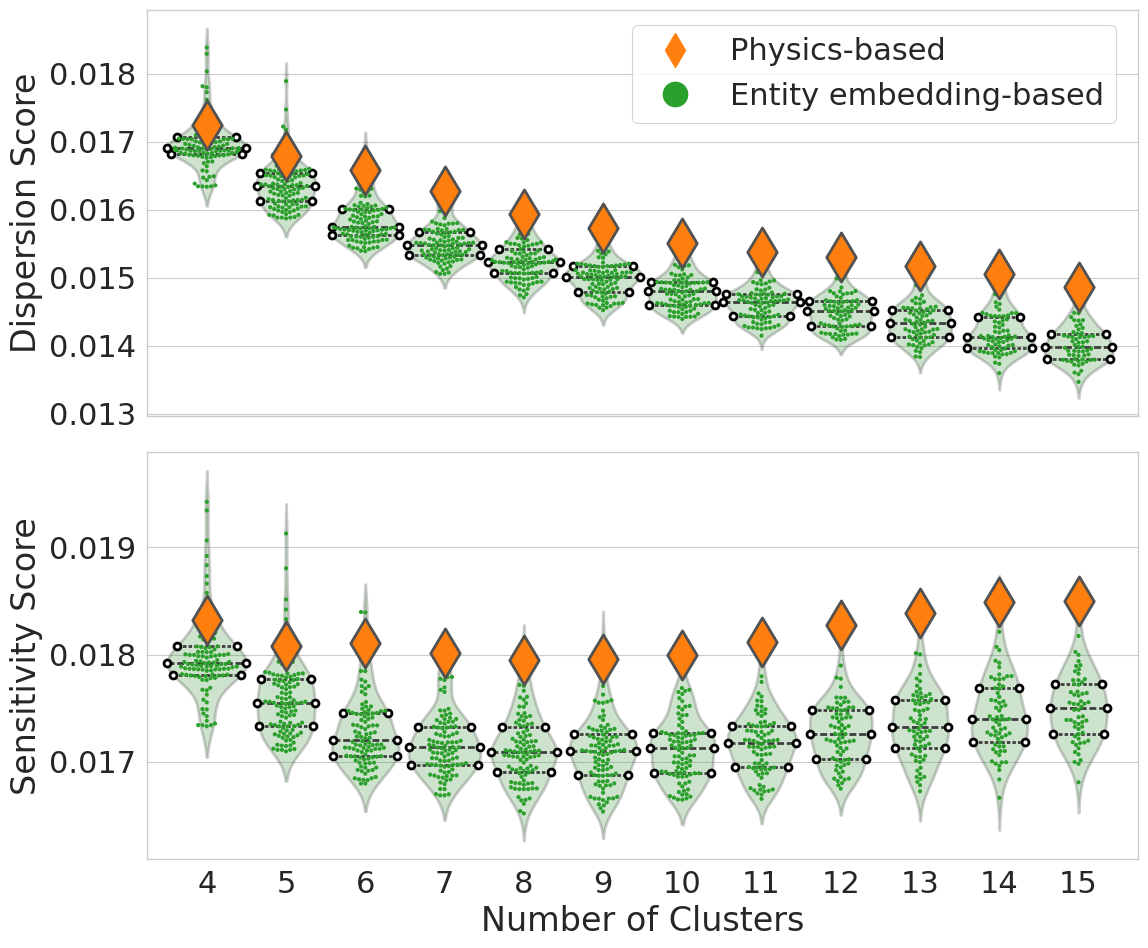

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

log_scale   = False
warn_thresh = 1
small_size  = 3
big_size    = 25
alpha       = 0.25
width       = 1.0
marker      = "d"
lw          = 2
inner_kws = {"marker":"o", "markersize": 5, "markeredgecolor":"black", "markerfacecolor":"white", "linewidth": 2, "markeredgewidth": 2}

sns.swarmplot(
    data=df_disp[df_disp["Method"]!="Pooled"],
    x="Number of Clusters", y="Dispersion Score",
    hue="Method",
    ax=ax[0],
    size=small_size,
    log_scale=log_scale,
    warn_thresh=warn_thresh,
    palette={"Physics-based":"C1", "Entity":"C2"},
)

mask = df_disp["Method"].isin(["Physics-based"])
sns.swarmplot(
    data=df_disp[mask],
    x="Number of Clusters", y="Dispersion Score",
    hue="Method",
    ax=ax[0],
    size=big_size,
    log_scale=log_scale,
    warn_thresh=warn_thresh,
    palette={"Physics-based":"C1"},
    legend=False,
    marker=marker,
    linewidth=lw
)

sns.violinplot(
    data=df_disp[df_disp["Method"]=="Entity"],
    x="Number of Clusters", y="Dispersion Score",
    ax=ax[0],
    alpha=alpha, width=width,
    inner="quart", log_scale=log_scale,
    linewidth=lw,
    color="C2",
    inner_kws=inner_kws,
)

sns.swarmplot(
    data=df_sens[df_sens["Method"]!="Pooled"],
    x="Number of Clusters", y="Sensitivity Score",
    hue="Method",
    ax=ax[1],
    size=small_size,
    log_scale=log_scale,
    warn_thresh=warn_thresh,
    palette={"Physics-based":"C1", "Entity":"C2"}
)
mask = df_sens["Method"].isin(["Physics-based"])
sns.swarmplot(
    data=df_sens[mask],
    x="Number of Clusters", y="Sensitivity Score",
    hue="Method",
    ax=ax[1],
    size=big_size,
    log_scale=log_scale,
    warn_thresh=warn_thresh,
    palette={"Physics-based":"C1"},
    legend=False,
    marker=marker,
    linewidth=lw
)
sns.violinplot(
    data=df_sens[df_sens["Method"]=="Entity"],
    x="Number of Clusters", y="Sensitivity Score",
    ax=ax[1],
    alpha=alpha, width=width,
    inner="quart", log_scale=log_scale,
    linewidth=lw,
    color="C2",
    inner_kws=inner_kws,
)

for a in ax:
    a.set_xlim(-0.75, 11.75)
    a.set_xlabel("Number of Clusters")
ax[0].set_ylabel("Dispersion Score")
ax[1].set_ylabel("Sensitivity Score")


from matplotlib.lines import Line2D

for a in ax:
    if a.get_legend() is not None: a.get_legend().remove()

legend_handles = [
    Line2D([0], [0],
           marker=marker, color="C1", linestyle="None",
           markersize=big_size*0.7, label="Physics-based"),
    Line2D([0], [0],
           marker="o", color="C2", linestyle="None",
           markersize=big_size*0.7, label="Entity embedding-based"),
]

fig.legend(
    handles=legend_handles,
    ncol=1,
    loc="center",
    bbox_to_anchor=(0.75, 0.90),
)

plt.tight_layout()
fig.savefig("results/clusters_and_methods.png", bbox_inches="tight", dpi=300)
plt.show()


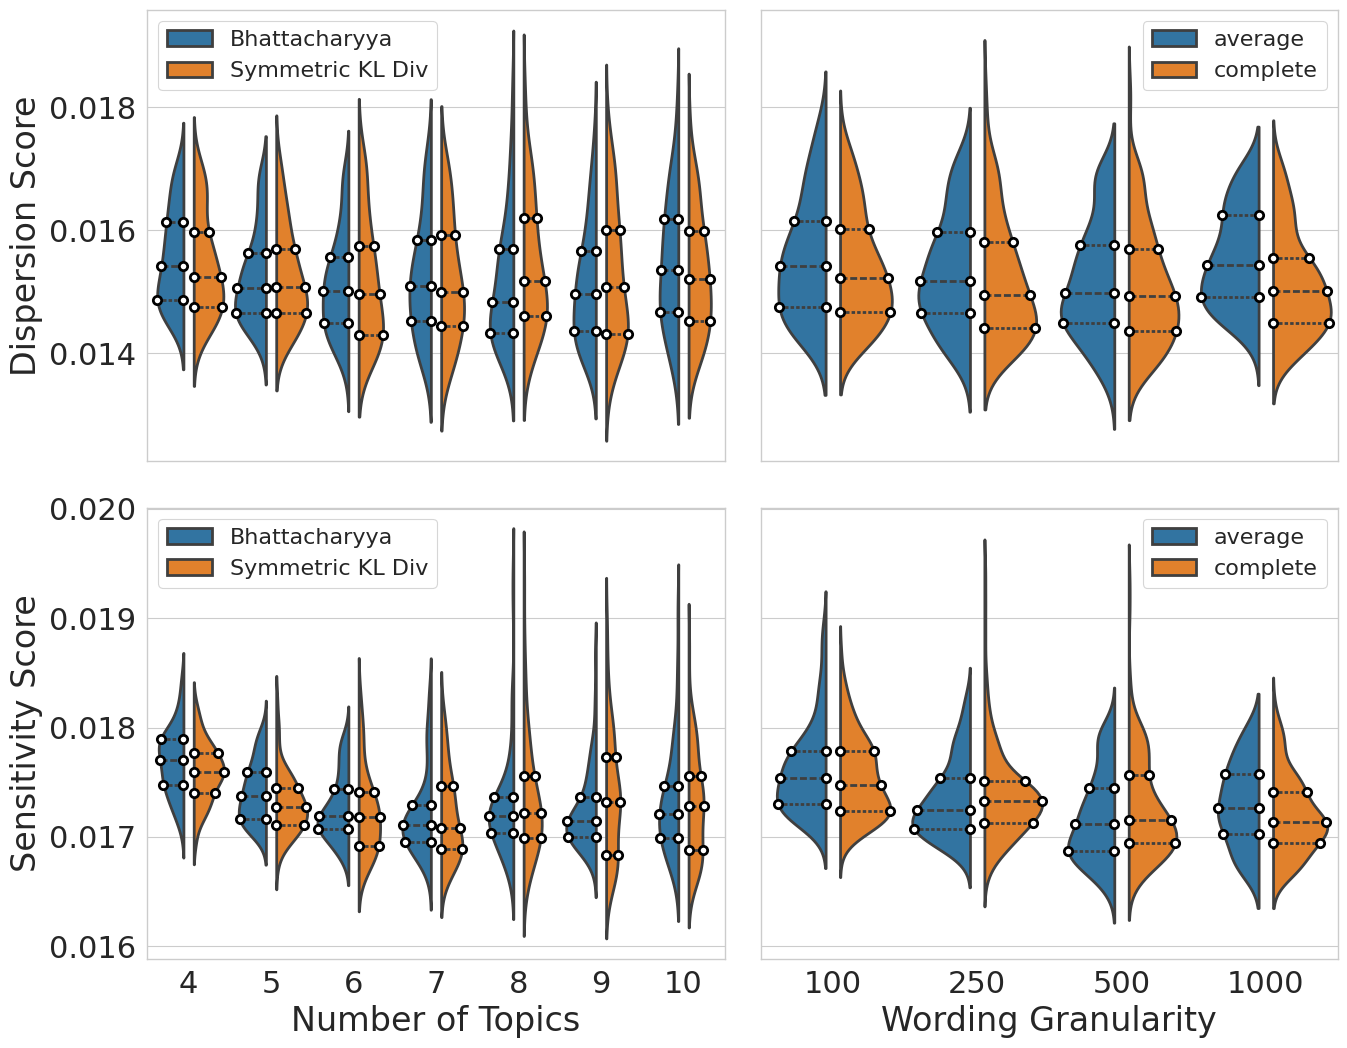

In [17]:
fig, ax = plt.subplots(2,2, figsize=(14, 11), sharey="row", sharex="col")
inner_kws = {"marker":"o", "markersize": 6, "markeredgecolor":"black", "markerfacecolor":"white", "markeredgewidth": 2}

sns.violinplot(data=df_disp[df_disp["Method"]=="Entity"], x="Number of Topics", y="Dispersion Score", hue="Distance Measure", ax=ax[0,0], linewidth=2, gap=0.25, width=1.0, split=True, inner="quart", inner_kws=inner_kws)
ax[0,0].legend(loc="upper left", ncol=1, fontsize=16)
ax[0,0].set_ylabel("Dispersion Score")
# sns.boxplot(data=df_disp[df_disp["Method"]=="Entity"], x="Wording Granularity", y="Dispersion Score", hue="Linkage", ax=ax[0,1], linewidth=2, gap=0.2, width=0.7)
sns.violinplot(data=df_disp[df_disp["Method"]=="Entity"], x="Wording Granularity", y="Dispersion Score", hue="Linkage", ax=ax[0,1], linewidth=2, gap=0.2, width=1.0, split=True, inner="quart", inner_kws=inner_kws)
ax[0,1].legend(loc="upper right", ncol=1, fontsize=16)
ax[0,1].set_ylabel("Dispersion Score")
# sns.boxplot(data=df_sens[df_sens["Method"]=="Entity"], x="Number of Topics", y="Sensitivity Score", hue="Distance Measure", ax=ax[1,0], linewidth=2, gap=0.2, width=0.7)
sns.violinplot(data=df_sens[df_sens["Method"]=="Entity"], x="Number of Topics", y="Sensitivity Score", hue="Distance Measure", ax=ax[1,0], linewidth=2, gap=0.25, width=1.0, split=True, inner="quart", inner_kws=inner_kws)
ax[1,0].legend(loc="upper left", ncol=1, fontsize=16)
ax[1,0].set_ylabel("Sensitivity Score")
# sns.boxplot(data=df_sens[df_sens["Method"]=="Entity"], x="Wording Granularity", y="Sensitivity Score", hue="Linkage", ax=ax[1,1], linewidth=2, gap=0.2, width=0.7)
sns.violinplot(data=df_sens[df_sens["Method"]=="Entity"], x="Wording Granularity", y="Sensitivity Score", hue="Linkage", ax=ax[1,1], linewidth=2, gap=0.2, width=1.0, split=True, inner="quart", inner_kws=inner_kws)
ax[1,1].legend(loc="upper right", ncol=1, fontsize=16)
ax[1,1].set_ylabel("Sensitivity Score")
plt.tight_layout()
plt.savefig("results/ablation.png", bbox_inches="tight", dpi=300)

In [ ]:
group_cols = [c for c in df_results_disp.columns 
              if c not in ["ID", "Quantile", "Value"]]

df_disp = (
    df_results_disp
      .groupby(group_cols, as_index=False, dropna=False)["Value"]
      .mean()
      .rename(columns={"Value": "Dispersion Score"})
)

df_sens = (
    df_results_sens
      .groupby(group_cols, as_index=False, dropna=False)["Value"]
      .mean()
      .rename(columns={"Value": "Sensitivity Score"})
)

In [20]:
df_disp_clstr = df_disp[df_disp["Method"]=="Entity"][["Number of Clusters", "Dispersion Score"]].groupby(["Number of Clusters"]).median()
df_sens_clstr = df_sens[df_sens["Method"]=="Entity"][["Number of Clusters", "Sensitivity Score"]].groupby(["Number of Clusters"]).median()

In [21]:
metric = df_disp_clstr["Dispersion Score"]+np.abs(df_disp_clstr["Dispersion Score"] - df_sens_clstr["Sensitivity Score"])

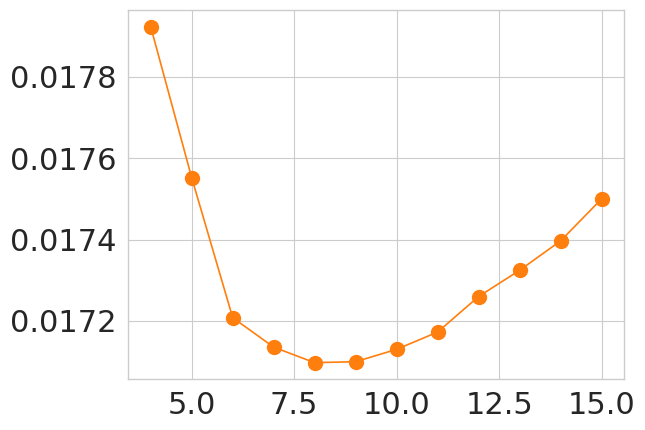

In [22]:
plt.plot(df_disp_clstr.index, metric, marker="o", markersize=10, color="C1", label="Combined Score")

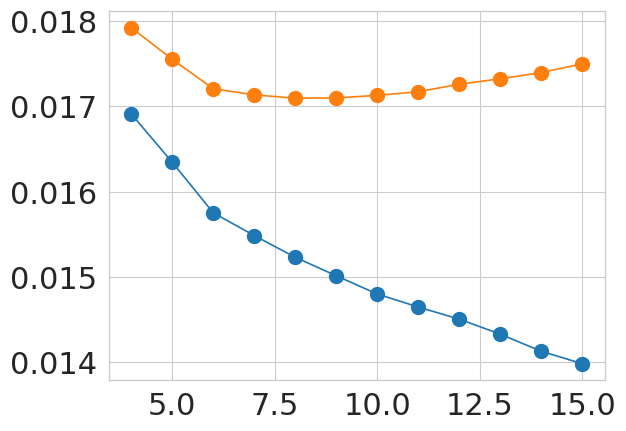

In [23]:
plt.plot(df_disp_clstr.index, df_disp_clstr["Dispersion Score"], marker="o", markersize=10)
plt.plot(df_sens_clstr.index, df_sens_clstr["Sensitivity Score"], marker="o", markersize=10)